In [1]:
import pandas as pd
import fasttext

In [2]:
data = pd.read_csv('new_data.csv', index_col=0)

In [3]:
data

,comments,labels
0,v get part add vertic bar front like v go cras...,0
1,hey make tutori collect view like current app ...,0
2,teach constraint storyboard god sake,0
3,one attach hyper link app directli connect via...,0
4,hey brian great video great content wonder web...,1
...,...,...
19725,differ cyber secur cyptographi network secur,1
19726,thank much beginn tri go field watch video enl...,0
19727,explain fast cant understand concept plea slow...,0
19728,video use,1


In [4]:
help(fasttext.FastText)

Help on module fasttext.FastText in fasttext:

NAME
    fasttext.FastText

DESCRIPTION
    # Copyright (c) 2017-present, Facebook, Inc.
    # All rights reserved.
    #
    # This source code is licensed under the MIT license found in the
    # LICENSE file in the root directory of this source tree.

FUNCTIONS
    cbow(*kargs, **kwargs)
    
    eprint(cls, *args, **kwargs)
    
    load_model(path)
        Load a model given a filepath and return a model object.
    
    read_args(arg_list, arg_dict, arg_names, default_values)
    
    skipgram(*kargs, **kwargs)
    
    supervised(*kargs, **kwargs)
    
    tokenize(text)
        Given a string of text, tokenize it and return a list of tokens
    
    train_supervised(*kargs, **kwargs)
        Train a supervised model and return a model object.
        
        input must be a filepath. The input text does not need to be tokenized
        as per the tokenize function, but it must be preprocessed and encoded
        as UTF-8. You migh

In [50]:
from sklearn.model_selection import train_test_split

X = data['comments']
y = data['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
train_df = pd.DataFrame({'comments': X_train})

In [57]:
train_df['labels'] = y

In [58]:
train_df.to_csv('train_df.csv')

In [84]:
import csv  
import re

train = open('comments3.train.txt','w')  
test = open('comments3.valid.txt','w')  
with open('train_df.csv', mode='r') as csv_file:  
    csv_reader = csv.DictReader(csv_file)
    line = 0
    for row in csv_reader:
        text = row['comments'].lower()
        text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',text)
        text = re.sub('@[^\s]+','', text)
        text = re.sub(r'#([^\s]+)', r'\1', text)
        text = re.sub('[\s]+', ' ', text)
        text = re.sub(r'\W*\b\w{1,3}\b', '', text)
        text = text.strip()
        print(f'__label__{row["labels"]} {text}', file=train)

In [113]:
model = fasttext.train_supervised('comments.train', epoch=20, lr=0.01, wordNgrams=2, loss='hs')

In [86]:
y_hat = []

In [107]:
for x_t in X_test:
    y_h = model.predict(str(x_t))
    lab = y_h[0][0]
    if(lab == '__label__0'):
        y_hat.append(0)
    else:
        y_hat.append(1)

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
score = accuracy_score(y_test, y_hat)

In [111]:
print(score)

0.7781719885115729


## Visualizations

In [80]:
lengths = []
for text in data['comments']:
    try:
        lengths.append(len(text))
    except:
        lengths.append(0)

In [81]:
data['len'] = lengths

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

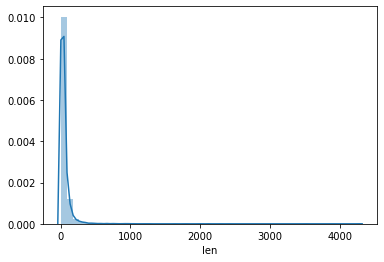

In [83]:
sns.distplot(data['len'])